# Setup


In [1]:
!pip install wget
!pip install pyngrok
#This is for setting up Tensorboard

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=69e70a4b368ed61e9d270d8ed73d381f06836960b863b8715df2e171e033e5e7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=5e02ee1c1f206e6c96436d49cb51337d4c346f619160bab67e25bf3bfebb4f8d
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


Tensorboard account connection:

In [2]:
!ngrok config add-authtoken 2WGZ2dMQB9G9ZYbyOTwtvvQhzTs_2Y6nVHjcEVgu1PUXVxYRL

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
%load_ext tensorboard

Here is the tensorboard for Q1, Q2:

In [17]:
%tensorboard --logdir /content/runs --host localhost --port 6666
from pyngrok import ngrok

public_url_q1_q2 = ngrok.connect(6666)
print('TB Link:', public_url_q1_q2)

<IPython.core.display.Javascript object>

TB Link: NgrokTunnel: "https://2c69-34-34-29-62.ngrok-free.app" -> "http://localhost:6666"


See below for Q3 tensorboard:

In [ ]:
%tensorboard --logdir /content/detection_logs --host localhost --port 6767
public_url_q3 = ngrok.connect(6767)
print('TB Link for detection_logs:', public_url_q3)

<IPython.core.display.Javascript object>

TB Link for detection_logs: NgrokTunnel: "https://964b-35-204-52-244.ngrok-free.app" -> "http://localhost:6767"


In [6]:
!git clone https://github.com/JamesEmi/VLRhw1.git

Cloning into 'VLRhw1'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 196 (delta 114), reused 136 (delta 76), pack-reused 0
Receiving objects: 100% (196/196), 472.04 KiB | 14.30 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [7]:
!bash /content/VLRhw1/q1_q2_classification/download_data.sh

> Downloading datasets to data
--2023-10-04 17:55:52--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M   235MB/s    in 1.9s    

2023-10-04 17:55:54 (235 MB/s) - ‘VOCtrainval_06-Nov-2007.tar’ saved [460032000/460032000]

--2023-10-04 17:55:55--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov

# Question 1

Running first for OG param values: `    args = ARGS(
        epochs = 10,
        inp_size = 64,
        use_cuda = True,
        val_every = 70,
        lr = 0.001,         #try annealing too.
        batch_size = 32,
        step_size = 10,
        gamma = 0.1
    )
`

In [9]:
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py

2023-10-04 18:03:08.813618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 18:03:09.810611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 10
args.gamma = 0.1
args.inp_size = 64
args.log_every = 100
args.lr = 0.001
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.val_every = 70

Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.680937
map:  0.08174210277843434
Epoch 0:  44% 69/157 [00:50<00:09,  8.83it/s]map:  0.10997795093045826
Epoch 0:  63% 99/157 [00:57<00:13,  4.42it/s]Train Epoch: 0 [100 (64%)]	Loss: 0.201129
Epoch 0:  89% 139/157 [01:20<00:01, 10.28it/s]map:  0

Okay just implemented the code for toggling data augmentations on and off. Now run scripts two times (data aug on and off) and plot the results here: (note that the hyperparams are still unoptimized).
`    args = ARGS(
        epochs = 10,
        inp_size = 64,
        use_cuda = True,
        val_every = 70,
        lr = 0.0005,         
        batch_size = 32,
        step_size = 10,
        gamma = 0.1,
        use_augmentations=True
    )
`

In [11]:
#run with data aug on
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py

2023-10-04 19:48:05.647282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 19:48:06.663647: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 10
args.gamma = 0.1
args.inp_size = 64
args.log_every = 100
args.lr = 0.0005
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = True
args.val_every = 70

Using Data Augmentations: True
Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.680937
map:  0.07972103564941685
Epoch 0:  45% 70/157 [00:50<00:08,  9.94it/s]map:  0.11192765339616892
Epoch 0:  64% 100/157 [00:56<00:10,  5.46it/s]Train Epoch: 0 [100 (64%)]	Loss:

In [12]:
#run with data aug off
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py

2023-10-04 20:01:38.833833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 20:01:39.809995: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 10
args.gamma = 0.1
args.inp_size = 64
args.log_every = 100
args.lr = 0.0005
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = False
args.val_every = 70

Using Data Augmentations: False
Epoch 0:   0% 0/157 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.680937
map:  0.07972148435526115
Epoch 0:  44% 69/157 [00:40<00:08, 10.69it/s]map:  0.11192938932518358
Epoch 0:  62% 97/157 [00:56<00:20,  2.98it/s]Train Epoch: 0 [100 (64%)]	Loss

put loss image here.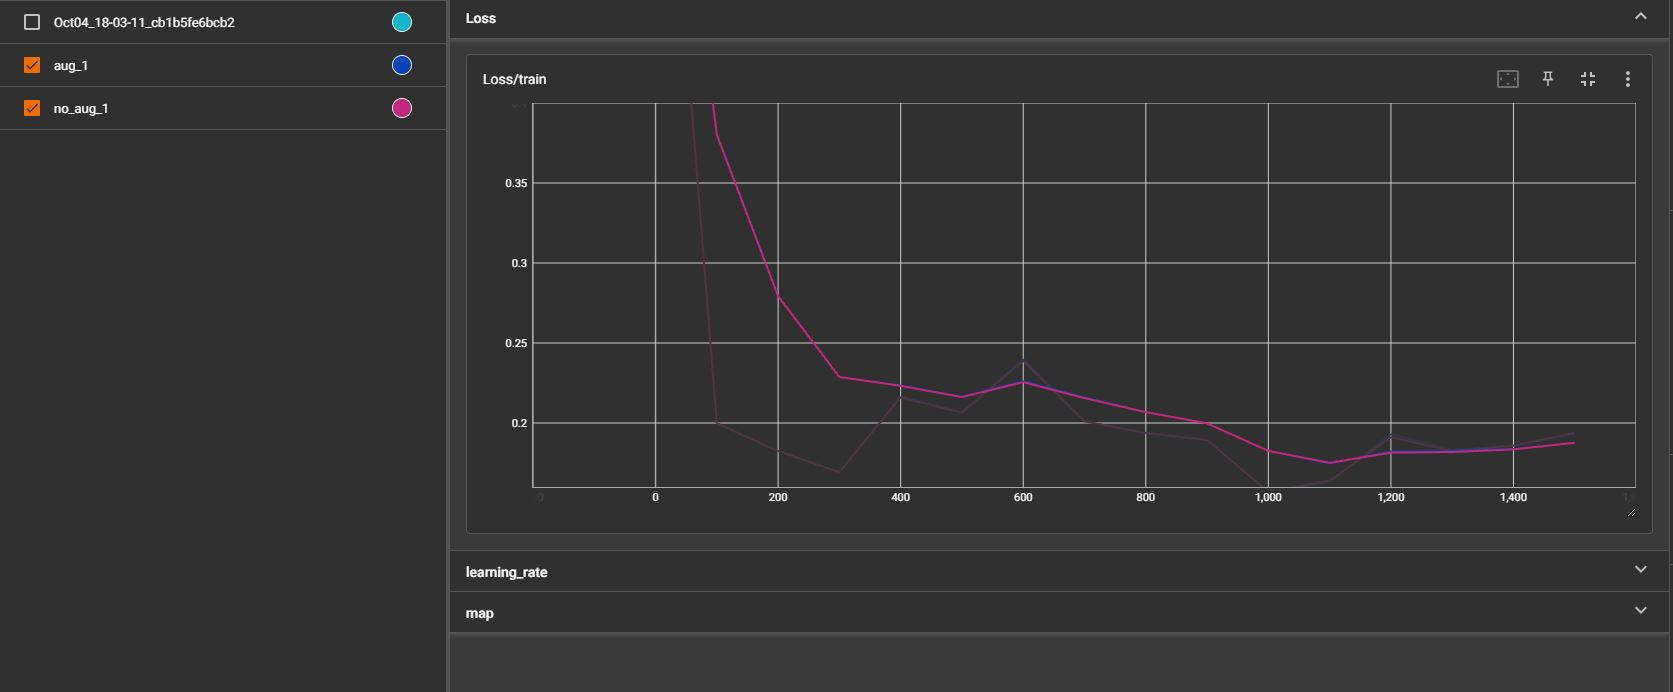

Optimize hyperparams to get mAP to 22.

Hyper params:
`    args = ARGS(
        epochs = 10,
        inp_size = 64,
        use_cuda = True,
        val_every = 70,
        lr = 0.0002,   
        batch_size = 64,
        step_size = 10,
        gamma = 0.88,
        use_augmentations=True
    )`

In [15]:
#Remember to update writer in trainer.py, foir logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#with data aug

2023-10-04 20:25:26.502880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 20:25:27.461548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 64
args.device = cuda
args.epochs = 10
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0002
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = True
args.val_every = 70

Using Data Augmentations: True
Epoch 0:   0% 0/79 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.683097
map:  0.07281706333355284
Epoch 0:  89% 70/79 [00:37<00:01,  5.21it/s]map:  0.11124238356761758
Epoch 0: 100% 79/79 [01:01<00:00,  1.28it/s]
Epoch 1:  27% 21/79 [00:05<00:20, 

In [16]:
#Remember to update writer in trainer.py, foir logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#without data aug

2023-10-04 20:44:02.880250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 20:44:03.882804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 64
args.device = cuda
args.epochs = 10
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0002
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.use_augmentations = False
args.val_every = 70

Using Data Augmentations: False
Epoch 0:   0% 0/79 [00:00<?, ?it/s]Train Epoch: 0 [0 (0%)]	Loss: 0.683097
map:  0.07281593466422107
Epoch 0:  89% 70/79 [00:38<00:01,  5.10it/s]map:  0.11124436592836505
Epoch 0: 100% 79/79 [01:02<00:00,  1.26it/s]
Epoch 1:  27% 21/79 [00:04<00:11

Try updating the hyperparams and changing the `get_random_augmentations()` method.

In [ ]:
#Remember to update writer in trainer.py, foir logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#with data aug

In [ ]:
#Remember to update writer in trainer.py, foir logging
!python3 /content/VLRhw1/q1_q2_classification/train_q1.py
#without data aug

# Question 2

In [ ]:
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

2023-10-04 01:10:15.935107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:10:16.872224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 32
args.device = cuda
args.epochs = 2
args.gamma = 0.85
args.inp_size = 64
args.log_every = 100
args.lr = 0.001
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.val_every = 70

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Argum

Write the `TSNE.py` file:

In [ ]:
!python /content/VLRhw1/q1_q2_classification/TSNE.py

2023-10-04 01:28:00.774325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:28:01.801397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights

In [ ]:
# #try for 5 epochs, with different hyper params - args = ARGS(
#         epochs=5,
#         inp_size=64,
#         use_cuda=True,
#         val_every=70,
#         lr=0.0003,
#         batch_size=64,
#         step_size=10,
#         gamma=0.85
#     )
!python3 /content/VLRhw1/q1_q2_classification/train_q2.py

2023-10-04 01:35:39.773858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:35:40.760447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
args.batch_size = 64
args.device = cuda
args.epochs = 5
args.gamma = 0.88
args.inp_size = 64
args.log_every = 100
args.lr = 0.0003
args.save_at_end = False
args.save_freq = -1
args.step_size = 10
args.test_batch_size = 1000
args.val_every = 70

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Argu

In [ ]:
!python /content/VLRhw1/q1_q2_classification/TSNE.py

2023-10-04 01:40:01.142615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 01:40:02.202320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights

# Question 3

In [ ]:
!cd /content/VLRhw1/detection
!rm -rf mAP
!git clone https://github.com/JamesEmi/mAP
!rm -rf mAP/input/*

Cloning into 'mAP'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 820 (delta 130), reused 118 (delta 118), pack-reused 675
Receiving objects: 100% (820/820), 5.18 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [ ]:
!python3 /content/VLRhw1/detection/train.py --visualize_gt

2023-10-03 21:37:27.036673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 21:37:28.894249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Please check your GPU (if running on AWS). Using CPU instead.
False
Loading data...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr

In [ ]:
!python3 /content/VLRhw1/detection/test_object_detection.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_X_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_X_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
../usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
......
--------------------------------------------

In [ ]:
!python3 /content/VLRhw1/detection/train.py --overfit

2023-10-03 23:53:48.625732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 23:53:49.573255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Good to go!
False
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib

Looks good, now try to look at `loss.png`:

Move on to inference:

In [ ]:
!python3 /content/VLRhw1/detection/train.py --overfit=False
#This is step 8 of README, run it later. Need loss curved from this.

In [ ]:
!python3 /content/VLRhw1/detection/train.py --inference=False --test_inference=False --overfit

2023-10-04 02:59:53.683516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 02:59:54.694529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Good to go!
True
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lo

In [ ]:
!pip show torch torchvision

Name: torch
Version: 2.0.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision, triton
---
Name: torchvision
Version: 0.15.2+cu118
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pillow, requests, torch
Required-by: fastai


In [ ]:
# prompt: deprecate my torch version to torch==1.12.1+cu113

!pip uninstall torch torchvision
!pip install torch==1.12.1 torchvision==0.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 36.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.12.1 which is incompatible.


In [ ]:
!cd /content/VLRhw1/detection
!rm -rf mAP
!git clone https://github.com/JamesEmi/mAP
!rm -rf mAP/input/*

Cloning into 'mAP'...
remote: Enumerating objects: 820, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 820 (delta 130), reused 118 (delta 118), pack-reused 675
Receiving objects: 100% (820/820), 5.18 MiB | 16.47 MiB/s, done.
Resolving deltas: 100% (308/308), done.


In [ ]:
!python3 /content/VLRhw1/detection/train.py --inference=False --test_inference=False --overfit

Good to go!
True
Loading data...
Loading a small subset for overfitting.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent 

Now, inference runs. Just make sure to update var names. Work on pdf.